## Creating Tweet Dataset

In [1]:
import GetOldTweets3 as got

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string

from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

import re

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 100)
pd.options.display.max_colwidth = 150

#### Retrieving Data from Twitter API via GetOldTweets3

In [94]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('anxiety')\
                                           .setSince('2018-06-13')\
                                           .setUntil('2020-06-13')\
                                           .setNear('New York')\
                                           .setMaxTweets(12000)\
                                           .setEmoji('unicode')
                                           

tweet_object = got.manager.TweetManager.getTweets(tweetCriteria)

In [95]:
len(tweet_object)

12000

In [96]:
tweet_test = list(map(lambda x: {'text': x.text}, tweet_object))

In [99]:
df = pd.DataFrame(tweet_test)

In [104]:
df.to_csv('emoji_test.csv', index = False)

In [105]:
test = pd.read_csv('emoji_test.csv')

In [107]:
test.head()

,text
0,OMG LMAO I can feel the anxiety of this tweet
1,"I, as a privileged white person, can never, ever feel or even understand the anxiety, fear, pain and frustration that POC feel about George Floyd ..."
2,Had anxiety the whole time I’m up here cause I dont do heights but was worth the view 🥴
3,"Saturday: Today could be somewhat overwhelming and could push you into a space of fear, worry, and anxiety. Take it easy and take things slowly. D..."
4,#coconutoil🥥 is a great holistic treatment for #memoryloss #anxiety #Depresion #alzheimers and any other #brain🧠 related condition 🤓 . . #MyelinSh...


In [66]:
#construct a dictionary of desired values

tweet_dict = list(map(lambda x: {'text': x.text, 'user': x.username,
                                 'date': x.date, 'retweet': x.retweets,
                                 'mention': x.mentions, 'hashtags': x.hashtags,
                                 'location' : x.geo}, tweet_object))


In [87]:
#turn dictionary into dataframe 

df = pd.DataFrame(tweet_dict)

In [113]:
#preview dataframe
print(df.shape)
df.head()


(10000, 7)


,text,user,date,retweet,mention,hashtags,location
0,It's okay to not totally understand the specific struggles of queer Japanese / Japanese people... but you can be open to learning about it. Just b...,wakuu,2020-06-08 23:58:16+00:00,1,,,
1,"10 things to know before returning to your hair salon Excitement, anxiety and a new normal at salons and barber shops as Long Island enters Phase ...",cbiz,2020-06-08 23:58:01+00:00,0,,#phase2,
2,"Well that information would have been useful 2 months ago, and avoided wasted anxiety every single time a person came even slightly close to enter...",SKastenbaum,2020-06-08 23:50:47+00:00,0,,,
3,My anxiety hasn’t been the greatest lately.,xI_am_Carolinex,2020-06-08 23:49:55+00:00,0,,,
4,i was mostly afraid because i have really bad anxiety and we've had misunderstandings in the past so i kept a lot to myself but recently it reache...,darshanaheena,2020-06-08 23:48:03+00:00,0,,,


In [75]:
#write tweets to csv 
df.to_csv('anxiety_tweets.csv', index = False)

### Cleaning and analyzing text data 

In [62]:
df = pd.read_csv('anxiety_tweets.csv')

In [63]:
df.head()

,text,user,date,retweet,mention,hashtags,location
0,It's okay to not totally understand the specific struggles of queer Japanese / Japanese people... but you can be open to learning about it. Just b...,wakuu,2020-06-08 23:58:16+00:00,1,NaN,NaN,NaN
1,"10 things to know before returning to your hair salon Excitement, anxiety and a new normal at salons and barber shops as Long Island enters Phase ...",cbiz,2020-06-08 23:58:01+00:00,0,NaN,#phase2,NaN
2,"Well that information would have been useful 2 months ago, and avoided wasted anxiety every single time a person came even slightly close to enter...",SKastenbaum,2020-06-08 23:50:47+00:00,0,NaN,NaN,NaN
3,My anxiety hasn’t been the greatest lately.,xI_am_Carolinex,2020-06-08 23:49:55+00:00,0,NaN,NaN,NaN
4,i was mostly afraid because i have really bad anxiety and we've had misunderstandings in the past so i kept a lot to myself but recently it reache...,darshanaheena,2020-06-08 23:48:03+00:00,0,NaN,NaN,NaN


## Data pre-processing

In [64]:
#for the purposes of this analysis, only text col will be used
df.drop(columns = ['user', 'date', 'retweet', 'mention', 'hashtags', 'location'], inplace = True)

In [65]:
df.head()

,text
0,It's okay to not totally understand the specific struggles of queer Japanese / Japanese people... but you can be open to learning about it. Just b...
1,"10 things to know before returning to your hair salon Excitement, anxiety and a new normal at salons and barber shops as Long Island enters Phase ..."
2,"Well that information would have been useful 2 months ago, and avoided wasted anxiety every single time a person came even slightly close to enter..."
3,My anxiety hasn’t been the greatest lately.
4,i was mostly afraid because i have really bad anxiety and we've had misunderstandings in the past so i kept a lot to myself but recently it reache...


In [66]:
stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation)
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [67]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [68]:
def process_text(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token) > 3]
    return stopwords_removed

In [69]:
df['text'] = df['text'].apply(process_text)

In [70]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

In [71]:
df['text'] = df['text'].apply(lemmatize_text)

In [5]:
# def remove_urls(df):
#     df['text'] = df['text'].str.replace(r"http\S+", "")

# remove_urls(df)

In [72]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max sentence length is {}'.format(max(sentence_lengths)))

117042 words total, with a vocabulary size of 17291
Max sentence length is 33


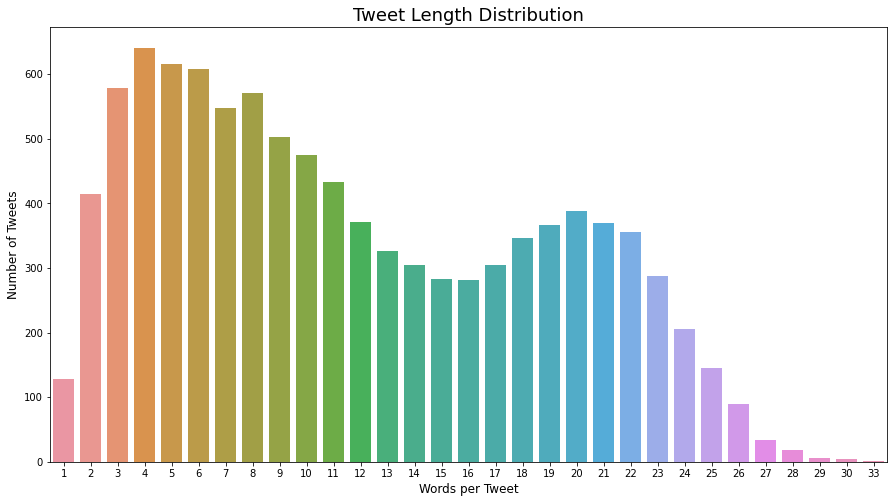

In [73]:
plt.figure(figsize = (15,8))
sns.countplot(sentence_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize =12)
plt.show()

In [74]:
del_token = [] 

for tweet in df['text']:
    for token in tweet:
        if len(token) < 3: 
            del_token.append(token)
            

In [49]:
sum(sentence_lengths) / len(sentence_lengths)

11.7042

In [50]:
flat_words = [item for sublist in df['text'] for item in sublist]

In [51]:
word_freq = FreqDist(flat_words)

In [52]:
word_freq

FreqDist({'anxiety': 9992, 'like': 1066, 'http': 922, 'time': 888, 'people': 785, 'depression': 633, 'feel': 625, 'much': 619, 'give': 600, 'help': 527, ...})

In [55]:
word_freq.most_common(40)

[('anxiety', 9992),
 ('like', 1066),
 ('http', 922),
 ('time', 888),
 ('people', 785),
 ('depression', 633),
 ('feel', 625),
 ('much', 619),
 ('give', 600),
 ('help', 527),
 ('know', 515),
 ('attack', 507),
 ('really', 479),
 ('stress', 479),
 ('going', 465),
 ('today', 454),
 ('thing', 452),
 ('need', 452),
 ('social', 428),
 ('make', 419),
 ('right', 390),
 ('work', 370),
 ('think', 357),
 ('good', 355),
 ('fear', 353),
 ('take', 353),
 ('life', 339),
 ('would', 325),
 ('want', 325),
 ('even', 322),
 ('back', 318),
 ('also', 315),
 ('feeling', 314),
 ('shit', 312),
 ('year', 305),
 ('love', 304),
 ('giving', 293),
 ('sleep', 292),
 ('week', 288),
 ('many', 281)]

In [78]:
df

,text
0,"[okay, totally, understand, specific, struggle, queer, japanese, japanese, people, open, learning, feel, personally, mean, exist, applies, racism,..."
1,"[thing, know, returning, hair, salon, excitement, anxiety, normal, salon, barber, shop, long, island, enters, phase, phase2]"
2,"[well, information, would, useful, month, avoided, wasted, anxiety, every, single, time, person, came, even, slightly, close, entering, general, v..."
3,"[anxiety, greatest, lately]"
4,"[mostly, afraid, really, anxiety, misunderstanding, past, kept, recently, reached, point, desperation, something, surprisingly, attentive, validat..."
...,...
9995,"[finished, season, know, give, anxiety, make, never, want, speak]"
9996,"[serious, note, hate, people, joke, laugh, rush, anxiety, like, really, actually, bother, please]"
9997,"[think, anxiety, attach, like, shaking, feeling, feel, limp]"
9998,"[tryna, deal, anxiety, depression, netflix, apple, music, bill, http, //twitter.com/memes_bizarre/status/1195701303047004160/video/1]"


In [79]:
df.to_csv('clean_anxiety_tweets.csv', index = False)

In [81]:
df.head()

,text
0,"[okay, totally, understand, specific, struggle, queer, japanese, japanese, people, open, learning, feel, personally, mean, exist, applies, racism,..."
1,"[thing, know, returning, hair, salon, excitement, anxiety, normal, salon, barber, shop, long, island, enters, phase, phase2]"
2,"[well, information, would, useful, month, avoided, wasted, anxiety, every, single, time, person, came, even, slightly, close, entering, general, v..."
3,"[anxiety, greatest, lately]"
4,"[mostly, afraid, really, anxiety, misunderstanding, past, kept, recently, reached, point, desperation, something, surprisingly, attentive, validat..."
